In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# funciones a minimizar
def f1(x):
    return (x[0] - 2)**2 + (x[1] - 1)**2

def f2(x):
    return x[0]**2 + (x[1] + 1)**2

def f3(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

fs = [f1, f2, f3]

In [86]:
# gradiente de funciones por diferenciación nmumérica
def gradiente(x, h=1e-6):
    m, n = len(fs), len(x)
    G = np.zeros((m, n))
    for i, f in enumerate(fs):
        for j in range(n):
            x_ph = x.copy(); x_mh = x.copy()
            x_ph[j] += h; x_mh[j] -= h
            G[i, j] = (f(x_ph) - f(x_mh)) / (2 * h)
    return G

In [87]:
# DS de Lara y Schutze
def DS(Grads):
    m, n = Grads.shape
    v = np.zeros(n)
    for i in range(m):
        gi = Grads[i]
        norm_gi = np.linalg.norm(gi)
        if norm_gi > 0:
            v += gi / norm_gi
    d = -v
    norm_d = np.linalg.norm(d)
    return d / norm_d if norm_d > 0 else np.zeros_like(d)

In [88]:
# búsqueda de línea simple (bls)
def bls(x, d, b=0.5, t_min=1e-6):
    t = 1.0
    f0 = np.array([f(x) for f in fs])
    while t > t_min:
        x_new = x + t * d
        f_new = np.array([f(x_new) for f in fs])
        if np.all(f_new < f0):
            return t
        t *= b
    return 0.0

In [89]:
# DS para un punto inicial x0
def ds_descent(x0, tol=1e-6, max_iter=50):
    x = x0.copy()
    for k in range(max_iter):
        G = gradiente(x)
        d = DS(G)
        if np.linalg.norm(d) < tol:
            break
        t = bls(x, d)
        if t == 0:
            break
        x = x + t * d
    return x

In [90]:
# encontrar el conjunto de Pareto
def pareto(x0_list, **kwargs):
    front = []
    for x0 in x0_list:
        x_star = ds_descent(x0, **kwargs)
        f_star = np.array([f(x_star) for f in fs])
        front.append(f_star)
    return np.array(front)

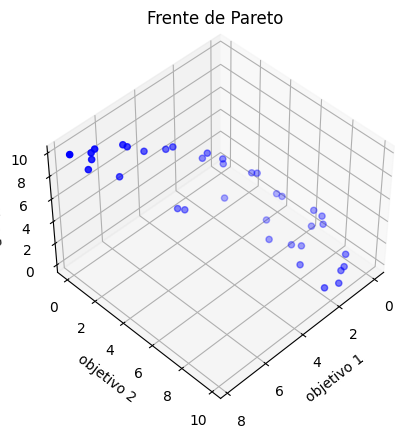

Frente de Pareto (f1, f2, f3):
Punto 0: [7.7825 0.0025 9.8719]
Punto 1: [6.8064 0.0706 8.4001]
Punto 2: [5.8237 0.5599 6.2089]
Punto 3: [4.2196 2.3694 3.1374]
Punto 4: [1.3371 4.8462 0.9592]
Punto 5: [1.3685 6.5973 0.3638]
Punto 6: [6.6492 0.0957 9.1417]
Punto 7: [6.7995 0.0518 8.9491]
Punto 8: [7.0775 0.1973 7.9529]
Punto 9: [3.9692 2.5379 2.8843]
Punto 10: [1.8762 5.6962 0.6141]
Punto 11: [1.1228 6.9769 0.3244]
Punto 12: [5.4663 0.3835 8.4361]
Punto 13: [5.251  0.3788 8.0155]
Punto 14: [4.52 0.52 6.92]
Punto 15: [2.12 2.92 2.12]
Punto 16: [1.8156 7.7242 0.1507]
Punto 17: [1.9779 9.5409 0.0061]
Punto 18: [3.7134 0.9471 6.5672]
Punto 19: [3.535  1.2047 6.8003]
Punto 20: [2.3821 2.0704 5.7185]
Punto 21: [0.52 4.52 2.12]
Punto 22: [0.9563 9.4136 0.1998]
Punto 23: [1.437  9.8392 0.0524]
Punto 24: [2.3829 1.7259 4.955 ]
Punto 25: [1.7441 2.354  4.2911]
Punto 26: [0.9407 3.6786 3.7173]
Punto 27: [0.0803 6.51   1.9195]
Punto 28: [0.3323 6.6909 0.9234]
Punto 29: [0.7668 9.3988 0.3103]
Punto 3

In [102]:
if __name__ == '__main__':
    # puntos cualesquiera en el espacio de decisión
    xs = np.linspace(-1, 3, 6)
    ys = np.linspace(-3, 3, 6)
    initial_points = [np.array([x, y]) for x in xs for y in ys]

    
    pareto_F = pareto(initial_points, tol=1e-6, max_iter=50)

    #grafo del frente de Pareto
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=45, azim=45)

    x = pareto_F[:, 0]
    y = pareto_F[:, 1]
    z = pareto_F[:, 2]

    ax.scatter(x, y, z, color='blue')
    ax.set_xlabel('objetivo 1')
    ax.set_ylabel('objetivo 2')
    ax.set_zlabel('objetivo 3')
    plt.title('Frente de Pareto')
    #plt.savefig('Pareto.png')
    plt.show()

    # elementos del frente de Pareto
    print("Frente de Pareto (f1, f2, f3):")
    for idx, f_vals in enumerate(pareto_F):
        print(f"Punto {idx}: {f_vals}")